/tmp/ipykernel_25359/1134312499.py:250: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


Summary Statistics by Qubit Count:
Qubits: 6
  Budget: 1268.20 (min: 366.00, max: 2166.00)
  Stocks: 2.60 (min: 2, max: 4)
Qubits: 7
  Budget: 1420.00 (min: 294.00, max: 4467.00)
  Stocks: 2.60 (min: 2, max: 4)
Qubits: 8
  Budget: 2861.40 (min: 410.00, max: 5385.00)
  Stocks: 2.30 (min: 2, max: 5)
Qubits: 9
  Budget: 2603.60 (min: 437.00, max: 5404.00)
  Stocks: 2.40 (min: 2, max: 5)
Qubits: 10
  Budget: 3338.40 (min: 671.00, max: 5913.00)
  Stocks: 2.40 (min: 2, max: 5)
Qubits: 11
  Budget: 2780.40 (min: 869.00, max: 5296.00)
  Stocks: 2.60 (min: 2, max: 5)
Qubits: 12
  Budget: 2611.30 (min: 540.00, max: 5700.00)
  Stocks: 3.10 (min: 2, max: 6)
Qubits: 13
  Budget: 1893.40 (min: 547.00, max: 5710.00)
  Stocks: 3.50 (min: 2, max: 5)
Qubits: 14
  Budget: 3833.70 (min: 1597.00, max: 5497.00)
  Stocks: 2.90 (min: 2, max: 3)
Qubits: 15
  Budget: 1949.00 (min: 483.00, max: 4139.00)
  Stocks: 4.10 (min: 3, max: 6)


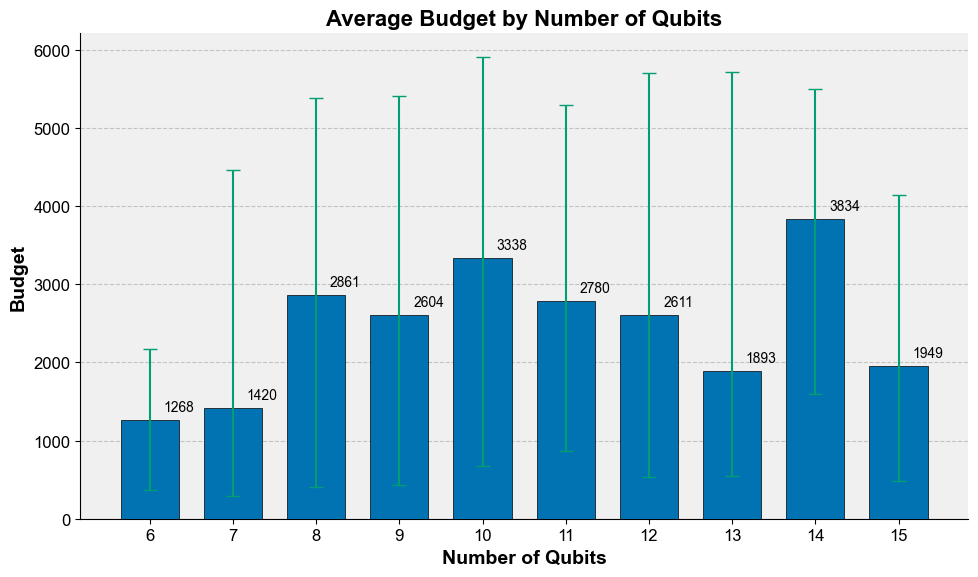

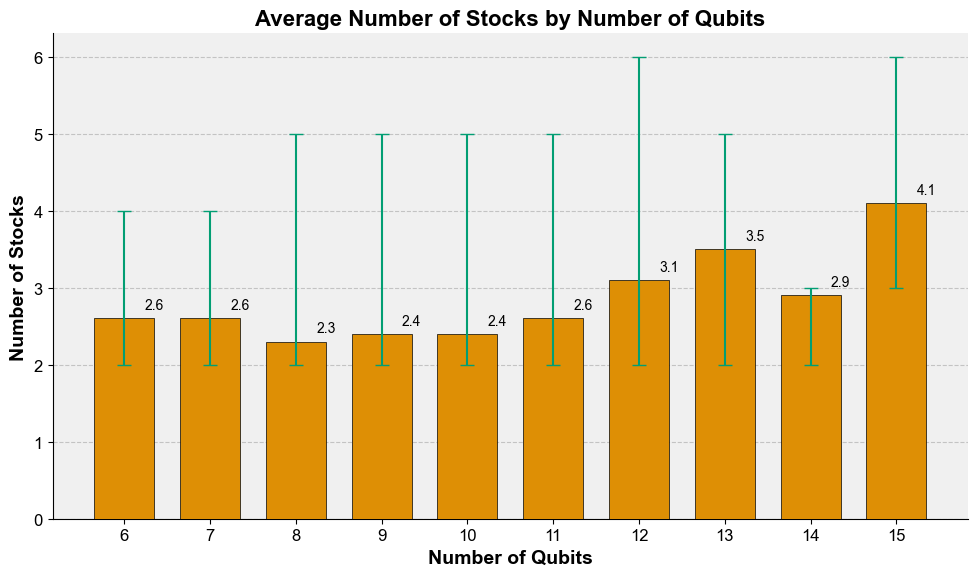

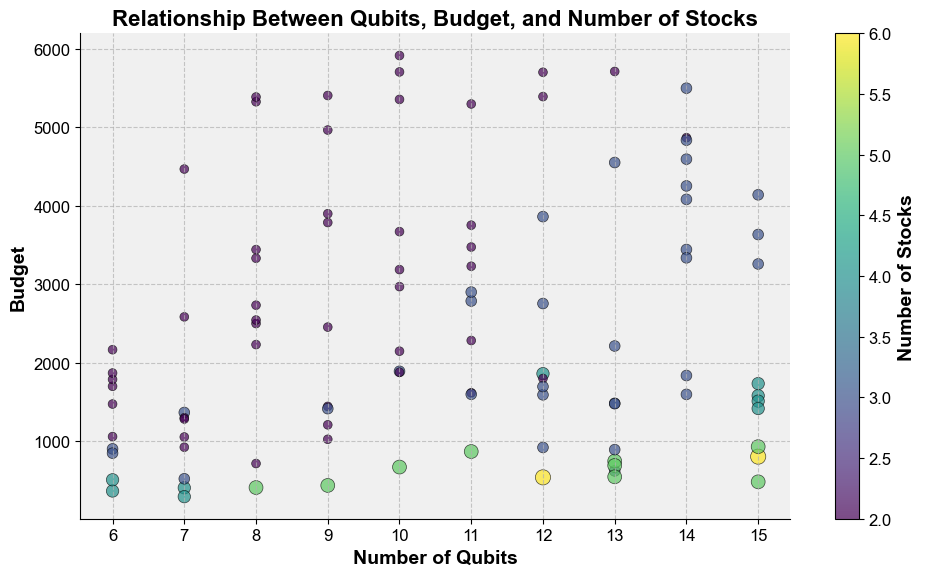

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict

# Set publication-quality parameters for matplotlib
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 14,
    'axes.linewidth': 0.8,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.frameon': False,
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.5
})

# Sample data based on the provided structure
with open("../experiments_data.json", "r") as f:
    sample_data = json.load(f)["data"]


# Process data to get statistics by qubit count
def process_by_qubits(data):
    qubit_map = defaultdict(lambda: {"budgets": [], "stock_counts": []})
    
    for item in data:
        n_qubits = item["max_qubits"]
        qubit_map[n_qubits]["budgets"].append(item["budget"])
        qubit_map[n_qubits]["stock_counts"].append(item["n_stocks"])
    
    qubit_stats = []
    for qubits, stats in sorted(qubit_map.items()):
        budgets = stats["budgets"]
        stocks = stats["stock_counts"]
        
        qubit_stats.append({
            "qubits": int(qubits),
            "avg_budget": np.mean(budgets),
            "min_budget": np.min(budgets),
            "max_budget": np.max(budgets),
            "std_budget": np.std(budgets),
            "avg_stocks": np.mean(stocks),
            "min_stocks": np.min(stocks),
            "max_stocks": np.max(stocks),
            "std_stocks": np.std(stocks)
        })
    
    return qubit_stats

def plot_budget_by_qubits(qubit_stats, save_path=None, dpi=300, fig_width=10, fig_height=6):
    """
    Creates a publication-quality bar plot showing average budget by qubit count.
    
    Parameters:
    -----------
    qubit_stats : list
        List of dictionaries containing statistics by qubit count.
    save_path : str, optional
        Path to save the figure. If None, the figure is displayed but not saved.
    dpi : int, optional
        Resolution of the saved figure in dots per inch.
    fig_width : float, optional
        Width of the figure in inches.
    fig_height : float, optional
        Height of the figure in inches.
    
    Returns:
    --------
    fig, ax : tuple
        Figure and axes objects for further customization if needed.
    """
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Set smoke gray background for plotting area
    ax.set_facecolor('#f0f0f0')  # Light smoke gray
    
    # Extract data
    qubits = [stat["qubits"] for stat in qubit_stats]
    avg_budgets = [stat["avg_budget"] for stat in qubit_stats]
    min_budgets = [stat["min_budget"] for stat in qubit_stats]
    max_budgets = [stat["max_budget"] for stat in qubit_stats]
    errors = [
        [avg - min for avg, min in zip(avg_budgets, min_budgets)],
        [max - avg for avg, max in zip(avg_budgets, max_budgets)]
    ]
    
    # Define a professional color palette (colorblind-friendly)
    colors = ['#0173B2', '#DE8F05', '#029E73']
    
    # Plot bars with error bars
    bars = ax.bar(qubits, avg_budgets, width=0.7, color=colors[0], 
                  edgecolor='black', linewidth=0.5, zorder=3,
                  yerr=errors, capsize=5, error_kw={'ecolor': '#029E73', 'linewidth': 1.5})
    
    # Add value labels on top of bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width(), height + 0.02*max(avg_budgets),
                f'{height:.0f}', ha='center', va='bottom', fontsize=10)
    
    add_value_labels(bars)
    
    # Customize axes
    ax.set_xlabel("Number of Qubits", fontweight='bold')
    ax.set_ylabel("Budget", fontweight='bold')
    ax.set_title("Average Budget by Number of Qubits", fontweight='bold', fontsize=16)
    
    # Set x-ticks
    ax.set_xticks(qubits)
    ax.set_xticklabels([str(q) for q in qubits])
    
    # Add grid lines for y-axis only, behind the bars
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    # Customize spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig, ax

def plot_stocks_by_qubits(qubit_stats, save_path=None, dpi=300, fig_width=10, fig_height=6):
    """
    Creates a publication-quality bar plot showing average number of stocks by qubit count.
    """
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Set smoke gray background for plotting area
    ax.set_facecolor('#f0f0f0')  # Light smoke gray
    
    # Extract data
    qubits = [stat["qubits"] for stat in qubit_stats]
    avg_stocks = [stat["avg_stocks"] for stat in qubit_stats]
    min_stocks = [stat["min_stocks"] for stat in qubit_stats]
    max_stocks = [stat["max_stocks"] for stat in qubit_stats]
    errors = [
        [avg - min for avg, min in zip(avg_stocks, min_stocks)],
        [max - avg for avg, max in zip(avg_stocks, max_stocks)]
    ]
    
    # Define a professional color palette (colorblind-friendly)
    colors = ['#0173B2', '#DE8F05', '#029E73']
    
    # Plot bars with error bars
    bars = ax.bar(qubits, avg_stocks, width=0.7, color=colors[1], 
                  edgecolor='black', linewidth=0.5, zorder=3,
                  yerr=errors, capsize=5, error_kw={'ecolor': '#029E73', 'linewidth': 1.5})
    
    # Add value labels on top of bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width(), height + 0.02*max(avg_stocks),
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)
    
    add_value_labels(bars)
    
    # Customize axes
    ax.set_xlabel("Number of Qubits", fontweight='bold')
    ax.set_ylabel("Number of Stocks", fontweight='bold')
    ax.set_title("Average Number of Stocks by Number of Qubits", fontweight='bold', fontsize=16)
    
    # Set x-ticks
    ax.set_xticks(qubits)
    ax.set_xticklabels([str(q) for q in qubits])
    
    # Add grid lines for y-axis only, behind the bars
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    # Customize spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig, ax

def plot_relationship_scatter(data, save_path=None, dpi=300, fig_width=10, fig_height=6):
    """
    Creates a publication-quality scatter plot showing the relationship between qubits, budget, and stocks.
    """
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Set smoke gray background for plotting area
    ax.set_facecolor('#f0f0f0')  # Light smoke gray
    
    # Extract data
    qubits = [item["max_qubits"] for item in data]
    budgets = [item["budget"] for item in data]
    stocks = [item["n_stocks"] for item in data]
    
    # Define a professional color palette (colorblind-friendly)
    colors = ['#0173B2', '#DE8F05', '#029E73']
    
    # Create scatter plot with size based on number of stocks
    scatter = ax.scatter(qubits, budgets, s=[n*20 for n in stocks], c=stocks, 
                        cmap='viridis', alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Add reference line
    #ax.axhline(y=500, color=colors[1], linestyle='--', alpha=0.7, label='Budget: 500')
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Number of Stocks', fontweight='bold')
    
    # Customize axes
    ax.set_xlabel("Number of Qubits", fontweight='bold')
    ax.set_ylabel("Budget", fontweight='bold')
    ax.set_title("Relationship Between Qubits, Budget, and Number of Stocks", fontweight='bold', fontsize=16)
    
    # Set x-ticks to integer values
    ax.set_xticks(range(min(qubits), max(qubits)+1))
    
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)
    
    # Customize spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add trend line
    #z = np.polyfit(qubits, budgets, 1)
    #p = np.poly1d(z)
    #x_trend = np.linspace(min(qubits), max(qubits), 100)
    #ax.plot(x_trend, p(x_trend), color=colors[0], linestyle='-', label=f'Trend: y={z[0]:.1f}x+{z[1]:.1f}')
    
    # Add legend
    ax.legend(loc='upper left')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    return fig, ax

def main():
    # Process data
    qubit_stats = process_by_qubits(sample_data)
    
    # Create plots
    plot_budget_by_qubits(qubit_stats, save_path="budget_by_qubits.png")
    plot_stocks_by_qubits(qubit_stats, save_path="stocks_by_qubits.png")
    plot_relationship_scatter(sample_data, save_path="qubits_budget_stocks_relationship.png")
    
    # Display summary statistics
    print("Summary Statistics by Qubit Count:")
    for stat in qubit_stats:
        print(f"Qubits: {stat['qubits']}")
        print(f"  Budget: {stat['avg_budget']:.2f} (min: {stat['min_budget']:.2f}, max: {stat['max_budget']:.2f})")
        print(f"  Stocks: {stat['avg_stocks']:.2f} (min: {stat['min_stocks']}, max: {stat['max_stocks']})")
    
    plt.show()

main()